<a href="https://colab.research.google.com/github/knownbymanoj/Machine_Learning/blob/main/%20Preprocessing%20%26%20Sampling.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Theory

### Preprocessing

One of the tasks of a data scientist is to guide the training process of  Machine Learning tasks. <br>
This operation does require the definition of a training strategy, which might involve some preprocessing operations. <br>
Preprocessing operations are meant to ease the training phase of our models, and sometimes they are essentials! <br>
In today's exercises, we will see a practical example. <br>

Now we show you some Sklearn preprocessing functions <a href = "https://scikit-learn.org/stable/modules/classes.html#module-sklearn.preprocessing"> [link] </a>. 

Usually, scaling operations are performed column-wise, i.e., each column is standadized independently.

In [1]:
import numpy as np

#define our array
data = np.array([[0, 0], [0, 0], [1, 2], [1, 1]])
print(data)

[[0 0]
 [0 0]
 [1 2]
 [1 1]]


A first example of preprocessing is the MinMaxScaler <a href = https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.MinMaxScaler.html#sklearn.preprocessing.MinMaxScaler> [link] </a>.

The MinMaxScaler transforms the features in a fixed range scale, for example $[0, 1]$ (default) <br>

The MinMaxScaler is defined as follows: 

    min = 0
    max = 1
    X_std = (X - X.min(axis=0)) / (X.max(axis=0) - X.min(axis=0))
    X_scaled = X_std * (max - min) + min

In [2]:
from sklearn.preprocessing import MinMaxScaler

#define the scaler
scaler1 = MinMaxScaler()

#fit the scaler
scaler1.fit(data)

print(scaler1.transform(data))

[[0.  0. ]
 [0.  0. ]
 [1.  1. ]
 [1.  0.5]]


Similarly, we can use the the StandardScaler <a href = "https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html#sklearn.preprocessing.StandardScaler"> [link] </a>. <br>

This scaler standardizes features by removing the mean and scaling to unit variance. For example, given an array $X$, the function outputs the following
$X_{std} = \frac{(X - \mu)}{\sigma}$

In [3]:
from sklearn.preprocessing import StandardScaler

#define the scaler
scaler2 = StandardScaler()

#fit the scaler
scaler2.fit(data)

print(scaler2.transform(data))

#we can plot also the mean of each axis
print(scaler2.mean_)

[[-1.         -0.90453403]
 [-1.         -0.90453403]
 [ 1.          1.50755672]
 [ 1.          0.30151134]]
[0.5  0.75]


If you apply preprocessing techniques, you need to use them on every sets (i.e., training, validation, and testing) consistently. <br>
When using preprocessing techniques, you need to apply the *fit* operation to the **training set only**. <br> 
The validation set can be used to find the best hyperparameter setting of the preprocessing function . <br>
The test set, instead, cannot be used for any reason. <br>
We can now see a simple example of what might goes wrong if do not respect such a requirement. 

In [4]:
#we first define a training array
X_tr = np.array([[0, 1, 2, 3, 4, 5, 6]]).T 

#the ground truth is defined as a binary classification task, where the sample
# is 0 if <=3, 1 otherwise
y_tr = np.array([0, 0, 0, 0, 1, 1, 1]) 

#we define the test set with the same rules
X_te = np.array([[0, 0, 3, 20]]).T
y_te = np.array([0, 0, 0, 1])

In [5]:
X_tr.shape

(7, 1)

In [6]:
#we might want to scale all of the training data in the range [0, 1]
scaler_tr = MinMaxScaler()
scaler_tr.fit(X_tr)
X_tr_scaled = scaler_tr.transform(X_tr)
print(X_tr_scaled)

[[0.        ]
 [0.16666667]
 [0.33333333]
 [0.5       ]
 [0.66666667]
 [0.83333333]
 [1.        ]]


A classifier might define a rule that, given a scaled point $x_i$, returns 0 if it is lower or equale than 0.5, 1 otherwise.  

In [7]:
#we now wrongly fit a new scaler over the test set. 
#let's see what happens
print(X_te)
scaler_te = MinMaxScaler()
scaler_te.fit(X_te)
X_te_scaled = scaler_te.transform(X_te)
print(X_te_scaled)

[[ 0]
 [ 0]
 [ 3]
 [20]]
[[0.  ]
 [0.  ]
 [0.15]
 [1.  ]]


The classifier we previously defined might work well in most cases, but it misclassify $x_i = 3$: now its scaled value is 0.15 and not 0.5. <br>
If we use the correct process, i.e., transforming the testing data with the scaler fitted on the training data, the output is correct.

In [8]:
#we now wrongly fit a new scaler over the test set. 
#let's see what happens
print(X_te)
X_te_scaled = scaler_tr.transform(X_te)
print(X_te_scaled)

[[ 0]
 [ 0]
 [ 3]
 [20]]
[[0.        ]
 [0.        ]
 [0.5       ]
 [3.33333333]]


### Undersampling / Oversampling

Sometimes we might face unbalanced datasets. <br>
In classification tasks, this means that the number of samples per class are not equal among the classes. <br>
These dataset can produce *deceiving* results, and today we are going to experiment with an ad hoc example. <br>

Let $X, y$ be a dataset defined over two classes $(c_0, c_1)$. 
Let $c_0$ be the minority class, and $c_1$ the majority one. <br>
We might face different unbalance levels, for example weak unbalance (e.g., $c_0 = 100$ and $c_1 = 110$), or heavily unbalance (e.g., $c_0 = 100$ and $c_1=1000$). <br> 
In general, when we have unbalanced data, we can apply two mitigation strategies:


1.   *Oversampling*: we use a generator $G$ to produce new samples belonging to $c_0$. In this way, we make $c_0$ bigger and closer to $c_1$.
2.   *Undersampling*: we use a generator $G$ to select a subset of samples belonging to $c_1$. In this way, we make $c_1$ smaller and closer to $c_0$. 

One simple way to implement such strategies in sci-kit learn is to use the **class_weight** parameter of many learning algorithms ([Logistic Regression](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html?highlight=logistic%20regression#sklearn.linear_model.LogisticRegression) and [Perceptron](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Perceptron.html?highlight=perceptron#) are among these). **class_weight** multiplies the error, during learning, on every example of that class. We can use that to weight the errors on the minority class such that overall they count as much as the ones on the majority class (see the explanation of the 'balanced' value of the parameter). <br> 
We now turn our attention to techniques that directly change the data at preprocessing time. 
We can find several techniques to define $G$. Today we show an example of oversampling and undersampling $G$. Remember: when defining $G$ we can explicitly define the magnitude of the sampling strategy. <br>
For example, in the case of oversampling:


*   100% balancy: from $c_0 = 100$ and $c_1=1000$ to $c_0 = 1000$ and $c_1=1000$.
*   50% balancy: from $c_0 = 100$ and $c_1=1000$ to $c_0 = 500$ and $c_1=1000$.


In our exercises we use generators $G$ developed by *imbalance learn* library, a library written on top of *sklearn* <a href = "https://imbalanced-learn.org/stable/index.html"> [link] </a>. <br>
We are going to use [SMOTE](https://imbalanced-learn.org/stable/references/generated/imblearn.over_sampling.SMOTE.html?highlight=smote#imblearn.over_sampling.SMOTE) (an oversampler), and [RandomUnderSampler](https://imbalanced-learn.org/stable/references/generated/imblearn.under_sampling.RandomUnderSampler.html?highlight=randomundersampler) (an undersampler).




In [9]:
from sklearn.datasets import make_classification
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import SMOTE

#we generate a two-classes dataset. 1000 samples. 
# c0 = 100 samples, c1 = 900 samples
X, y = make_classification(n_classes=2, class_sep=2, weights=[0.1, 0.9], n_informative= 1, n_redundant= 0,
                           flip_y=0, n_features=1, n_clusters_per_class=1, n_samples=1000, random_state=123)

#print the first 10 samples
print(X[:10], '\n' ,y[:10])

#we can see the distribution of the two classes
print(len(X))
print(f"Class 0:{np.sum(y == 0)}")
print(f"Class 1:{np.sum(y == 1)}")

[[ 3.30508966]
 [ 1.7806262 ]
 [ 2.33866443]
 [ 1.52007651]
 [ 2.58837882]
 [-1.66661221]
 [ 1.94721384]
 [ 3.02283045]
 [ 2.35284844]
 [ 2.26043847]] 
 [1 1 1 1 1 0 1 1 1 1]
1000
Class 0:100
Class 1:900


In [10]:
#we can try to use the undersampling strategy
#by using 0.5 as ratio, we ask the classifier to make the minority class 50% of the size of the majority one
#here the minority class size is fixed. We change the majority
undersampler = RandomUnderSampler(random_state = 123, sampling_strategy= 0.5)

#resample
X_under, y_under = undersampler.fit_resample(X, y)

#we can see the distribution of the two classes
print(len(X_under))
print(f"Class 0:{np.sum(y_under == 0)}")
print(f"Class 1:{np.sum(y_under == 1)}")

300
Class 0:100
Class 1:200


In [11]:
#we can try with the oversampling strategy
#by using 0.5 as ratio, we ask the classifier to make the minority class 50% of the size of the majority one
# here the majority class size is fixed. We vary the minority
oversampler = SMOTE(random_state = 123, sampling_strategy= 0.5)

#resample
X_over, y_over = oversampler.fit_resample(X, y)

#we can see the distribution of the two classes
print(len(X_over))
print(f"Class 0:{np.sum(y_over == 0)}")
print(f"Class 1:{np.sum(y_over == 1)}")

1350
Class 0:450
Class 1:900


--------------
# Exercises

### Exercise 1: Underfitting and Overfitting

In this exercise, we are going to see different effects of underfitting and overfitting. <br>
<br>
We can now load the dataset that we use in our exercise. 


In [12]:
from sklearn.datasets import load_wine #load our target dataset
import numpy as np

#load the dataset
dataset = load_wine()

#extract X and y
X = dataset.data
y = dataset.target

The dataset contains three classes: 

In [13]:
print(y)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2]


We now have a look on how the data looks like. <br>
Print the X and y shapes. 


In [14]:
#-----SOLUTION--------------
print(X.shape, y.shape)


(178, 13) (178,)


The dataset contains $178$ samples and $13$ features. <br>
The first thing to do, is to create the train, val, and test partitions. <br>

To do so, start by defining a split *X_train_val* and *X_test*, with $80\%$ of the samples in the *X_train_val* set. <br>
Then, get *X_train* and *X_val*, where *X_train* contains the $90\%$ of the samples. <br>

Set the *random_state* to 123 in this phase.


In [15]:
#-----SOLUTION--------------
from sklearn.model_selection import train_test_split

#split
X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, train_size = 0.8, random_state = 123) 
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, train_size = 0.9, random_state = 123) 

Now define a LogisticRegression with default parameters, fit it on the training data, and evaluate both on the training and validation sets. <br>
Use the *accuracy score* as the evaluation metric.

In [16]:
# expected output: 0.968503937007874 0.8666666666666667
#

In [17]:
#-----SOLUTION--------------
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

#define a logistic regression
lr = LogisticRegression()

#fit
lr.fit(X_train, y_train)

#prediction
y_train_pred = lr.predict(X_train)
y_val_pred = lr.predict(X_val)

#accuracy 
tr_acc = accuracy_score(y_train, y_train_pred)
val_acc = accuracy_score(y_val, y_val_pred)

print(tr_acc, val_acc)

0.968503937007874 0.8666666666666667


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


The previous cell returns the following message:

    ConvergenceWarning: lbfgs failed to converge (status=1): 
    STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

    Increase the number of iterations (max_iter) or scale the data as shown in: https://scikit-learn.org/stable/modules/preprocessing.html

    Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
    extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
    (0.9824561403508771, 0.8666666666666667)

Sklearn suggest you to to increase the max number of iterations, or to scale the data. <br>
We go for the second way. <br>
Using $X_{tr}$, fit a *standard scaler*, and transform $X_{tr}$, $X_{val}$, and $X_{te}$ using the fitted scaler.

In [ ]:

# The new variables are called X_train_scaled, X_val_scaled, and X_test_scaled

In [18]:
from sklearn.preprocessing import StandardScaler

#define the scaler
scaler = StandardScaler()

#fit the scaler on the training
scaler.fit(X_train)

#trasform the input
X_train_scaled = scaler.transform(X_train)
X_val_scaled = scaler.transform(X_val)
X_test_scaled = scaler.transform(X_test)

Print $\mu$ of the scaler. 

In [19]:
#--------------SOLUTION--------------
print(scaler.mean_)

[1.30235433e+01 2.23960630e+00 2.34456693e+00 1.91448819e+01
 9.95984252e+01 2.34440945e+00 2.16173228e+00 3.51023622e-01
 1.64881890e+00 4.88811023e+00 9.76818898e-01 2.70149606e+00
 7.40251969e+02]


We now check if the preprocessing solved our issue encountered in Ex 2.1.3. <br>
Train the logistic regression with default parameters on the scaled data and print the accuracy on the training and validation sets.

In [20]:
#--------------SOLUTION--------------

#define a logistic regression
lr = LogisticRegression()

#fit
lr.fit(X_train_scaled, y_train)

#prediction
y_train_pred = lr.predict(X_train_scaled)
y_val_pred = lr.predict(X_val_scaled)

#accuracy 
tr_acc = accuracy_score(y_train, y_train_pred)
val_acc = accuracy_score(y_val, y_val_pred)

print(tr_acc, val_acc)

1.0 1.0


# Exercise 2.2: Dealing with unbalanced data

We first define a new ad hoc dataset. 

In [21]:
from sklearn import datasets
import matplotlib.pyplot as plt 

X_toy, y_toy = datasets.make_classification(n_samples=10000, n_features=2, n_redundant=0,
	n_clusters_per_class=1, weights=[0.99], flip_y=0, random_state=1)

Print the number of samples, and the number of features. <br>

Split the data: first create a test set ($20\%$), and then split the remaining data into training and validation sets ($90\%$ training size, $10\%$ validation set size).

In [22]:
#--------------SOLUTION--------------
print(X_toy.shape[0], X_toy.shape[1])
#split
X_train_val, X_test, y_train_val, y_test = train_test_split(X_toy, y_toy, train_size = 0.8, random_state = 123) 
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, train_size = 0.9, random_state = 123) 

10000 2


Train a Logistic Regression with default parameters on the training set, and evaluate it on the validation set. <br>
Use the *accuracy score* as evaluation metric.  

In [23]:
#--------------SOLUTION--------------
#define the model
lr = LogisticRegression()

#train
lr.fit(X_train, y_train)

#evaluate
y_val_pred = lr.predict(X_val)
print(accuracy_score(y_val, y_val_pred))

0.99375


We just obtained a wonderful score! Almost perfect prediction. <br>
However, in datascience, we always need to verify our scores. <br>
We can start by counting the number of samples of each class contained in the training and validation sets (separately).

In [ ]:
#--------------SOLUTION--------------
print(f"Class 0: {np.sum(y_train == 0)}")
print(f"Class 1: {np.sum(y_train == 1)}")

print(f"Class 0: {np.sum(y_val == 0)}")
print(f"Class 1: {np.sum(y_val == 1)}")

Class 0: 7127
Class 1: 73
Class 0: 791
Class 1: 9


There is a high unbalance! For example, in the validation we have 791 samples belonging to class 0, and only 9 to class 1! Can this affect our scores? <br>
To understand how good is an accuracy of $0.99$, do the following:
create an array $y_{dummy} = 0$, where $|y_{dummy}| = |y_{val}|$. <br>
$|x|=n$ is the cardinality of x, in this example the vector x has n elements. 
<br>
Once you defined y_{dummy}, compute the validation accuracy between the true validation labels (i.e., $y_{val}$) and y_{dummy}.

In [24]:
#--------------SOLUTION--------------
y_dummy = np.zeros(len(y_val) ,dtype = int)
print(accuracy_score(y_val, y_dummy))

0.98875


Ok, that is not pretty amazing. <br>
The accuracy score is maybe not the best metric for unbalanced data. <br>
Let's use the [$AUC$ score](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.roc_auc_score.html) instead. <br>
Print both validation AUC of the $lr$ predictions and the $y_{dummy}$ with respect to the true labels.

In [ ]:
# Expected output: 0.72 for the logistic regression, and 0.5 for the dummy array.

In [25]:
from sklearn.metrics import roc_auc_score

print(roc_auc_score(y_val, y_val_pred))
print(roc_auc_score(y_val, y_dummy))

0.7222222222222222
0.5


AUC gives a more useful picture of our classifiers. <br>
Now we just need to improve the classification performance. <br>
We start by plotting the data. How does training data look like?


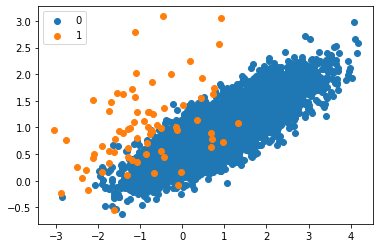

In [26]:
# scatter plot of examples by class label
from collections import Counter
from numpy import where

counter = Counter(y_train)

for label, _ in counter.items():
	row_ix = where(y_train == label)[0]
	plt.scatter(X_train[row_ix, 0], X_train[row_ix, 1], label=str(label))
plt.legend()
plt.show()

There is a big blue cluster, and a few orange points. <br>
Let's use SMOTE to oversample the minority class. <br>
Use the SMOTE with default parameters over the training set, and obtain new variables *X_train_over*, *y_train_over*.

In [27]:
#--------------SOLUTION--------------
from imblearn.over_sampling import SMOTE

# transform the dataset
oversample = SMOTE(random_state= 123)
X_train_over, y_train_over = oversample.fit_resample(X_train, y_train)

After the oversampling, print the number of samples contained in every class of the training. Is the balancy situation improved compared to the raw training set?

In [28]:
#--------------SOLUTION--------------
print(f"Class 0: {np.sum(y_train_over == 0)}")
print(f"Class 1: {np.sum(y_train_over == 1)}")

Class 0: 7127
Class 1: 7127


We can see how the training data changed.

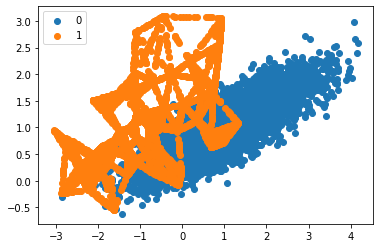

In [29]:
counter = Counter(y_train_over)

for label, _ in counter.items():
	row_ix = where(y_train_over == label)[0]
	plt.scatter(X_train_over[row_ix, 0], X_train_over[row_ix, 1], label=str(label))
plt.legend()
plt.show()

SMOTE creates novel artificial examples. Here is how it works (from the [paper](https://arxiv.org/pdf/1106.1813.pdf) where it was first described) in a nutshell:  
```
The minority class is over-sampled by taking each minority class sample and introducing synthetic examples along the line segments joining any/all of the k minority class nearest neighbors. 
Define a new Logistic Regression, train it over the oversampled
```

Define a new Logistic Regression, train it over the oversampled training data, and calculate the new validation AUC. 


In [30]:
#--------------SOLUTION--------------
#define the model
lr2 = LogisticRegression()

#train
lr2.fit(X_train_over, y_train_over)

#evaluate
y_val_pred = lr2.predict(X_val)
print(roc_auc_score(y_val, y_val_pred))

0.9620733249051834


Definitely better! Good job. <br>
We can now try another way to solve the unbalance problem: instead of increasing the number of samples belonging to the minority class (i.e., class 0), we reduce the number of sample of the majority one (i.e., class 1). <br>
Remember: the fit operations can be done only in the training data. <br>

Use the *RandomUnderSampler* with default parameters to undersample the training data. <br>
Call the new variables and obtain new variables X_train_under, y_train_under.
Print the distribution of the two undersampled classes.

In [31]:
#--------------SOLUTION--------------
from imblearn.under_sampling import RandomUnderSampler

#define the sampleing strategy
undersampler = RandomUnderSampler(random_state = 123)

X_train_under, y_train_under = undersampler.fit_resample(X_train, y_train)

print(f"Class 0: {np.sum(y_train_under == 0)}")
print(f"Class 1: {np.sum(y_train_under == 1)}")

Class 0: 73
Class 1: 73


Train a LogisticRegression using the undersampled training data, and evaluate with the AUC using the validation set. 

In [32]:
#--------------SOLUTION--------------
#define the model
lr3 = LogisticRegression()

#train
lr3.fit(X_train_under, y_train_under)

#evaluate
y_val_pred = lr3.predict(X_val)
print(roc_auc_score(y_val, y_val_pred))

0.907149880601208


We obtain a good performance as well, with only 73 samples per class. <br>
Let's try another sampling variation. <br>
In our first sampling solution we add samples to the minority class until the size is the same of the majority one, and in the second case we did the opposite, by reducing the majority class. <br>
Sampling solutions allow us to control the amount of *unbalancement* we want. <br>

For example, create a new undersampling strategy with *sampling stragy = 0.5*. This ratio indicates that the minority class size will be $1/2$ of the majority class size. <br>
Print the distribution of the new training data, then train a new LogisticRgression and evaluate it (with AUC) on the validation data. 

In [33]:
#define the sampleing strategy
undersampler = RandomUnderSampler(random_state = 123, sampling_strategy= 0.5)

X_train_under, y_train_under = undersampler.fit_resample(X_train, y_train)

print(f"Class 0: {np.sum(y_train_under == 0)}")
print(f"Class 1: {np.sum(y_train_under == 1)}")

#define the model
lr4 = LogisticRegression()

#train
lr4.fit(X_train_under, y_train_under)

#evaluate
y_val_pred = lr4.predict(X_val)
print(roc_auc_score(y_val, y_val_pred))

Class 0: 146
Class 1: 73
0.9349627756707403


We got a strong improvement ($+3$) on the validation set. 